### Group 6

Adaobi Nwachukwu : 0808547

Asif Ahmed : 0823547

Ayushi Patel: 0804322

Jaykumar Prakashkumar Prajapati: 0802302

Pavni Bhatt: 0822290

### **Objective:**
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
try:
    # Attempt to read with UTF-8 encoding
    df = pd.read_csv("/content/drive/MyDrive/Sales_data.csv", encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 fails, try a different encoding
    try:
        df = pd.read_csv("/content/drive/MyDrive/Sales_data.csv", encoding='latin1')
    except UnicodeDecodeError:
        print("Unable to read the CSV file with any encoding.")

1.2. Display the top 10 rows of the dataframe:

In [89]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


1.3. Check for missing values:



In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [91]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

1.4. Convert the InvoiceDate column to datetime format:



In [92]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':



In [93]:
df["TotalPrice"] = df["UnitPrice"] * df["Quantity"]

## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [94]:
len(df["StockCode"].unique())


4070

2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [95]:
df.groupby(by = ["StockCode"])["Quantity"].sum().sort_values(ascending=False).head(10)

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64

2.3. How many unique customers are there in the dataset?



In [96]:
len(df["CustomerID"].unique())

4373

2.4. Which country has the maximum number of unique customers?



In [97]:
df.groupby(by = ["Country"])["CustomerID"].nunique().sort_values(ascending=False).head(1)

Country
United Kingdom    3950
Name: CustomerID, dtype: int64

2.5. Visualize the distribution of 'TotalPrice' using a histogram.



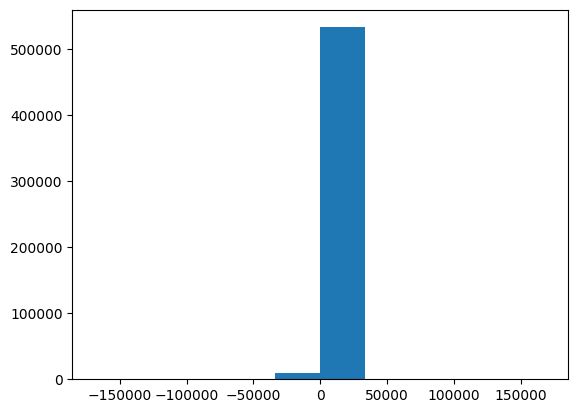

In [98]:
plt.hist(df["TotalPrice"])
plt.show()

## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

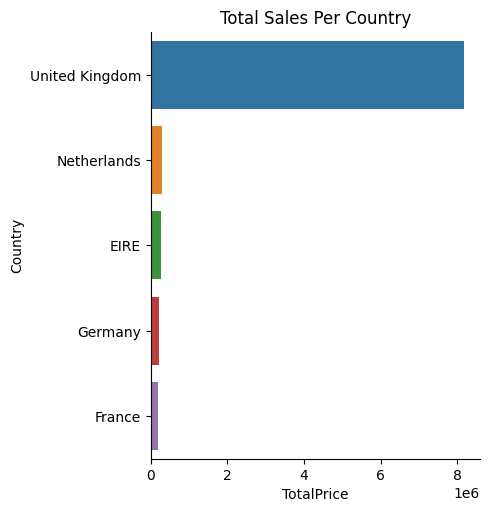

In [99]:
sub = df.groupby(by = ["Country"])["TotalPrice"].sum().sort_values(ascending=False)
print(sub)
sns.catplot(data=sub.reset_index().head(5), y="Country",x = "TotalPrice", kind="bar", errorbar=None, estimator='sum').set(title="Total Sales Per Country")
plt.show()

3.2. Identify the month in which the sales were highest.



In [100]:
df.groupby(pd.DatetimeIndex(df['InvoiceDate']).month)["TotalPrice"].sum().sort_values(ascending=False).head(1)

InvoiceDate
11    1461756.25
Name: TotalPrice, dtype: float64

3.3. Compute the average unit price per product.



In [101]:
subset = df[["UnitPrice","StockCode"]]
subset = subset.drop_duplicates()
subset["UnitPrice"].sum()/len(subset["StockCode"])

38.962305362921875

3.4. Compute the total quantity sold per customer.



In [102]:
df["Quantity"].sum()/len(df["CustomerID"].unique())

1183.7297050080037

## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



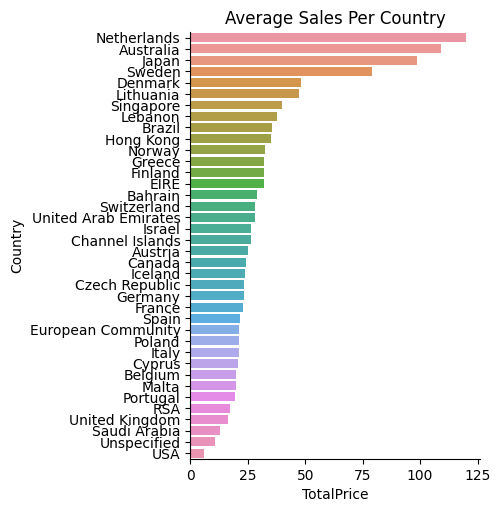

In [103]:
sns.catplot(data=df, y="Country",x = "TotalPrice", kind="bar", errorbar=None, estimator='mean',
            order = df.groupby(by = ["Country"])["TotalPrice"].mean().sort_values(ascending=False).index).set(title="Average Sales Per Country")
plt.show()

4.2. Plot a line graph to showcase the trend of sales over time.



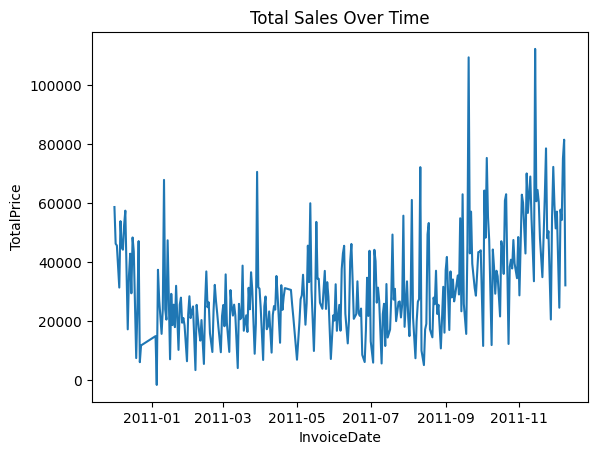

In [104]:
sub = df[["InvoiceDate","TotalPrice"]]
sub["InvoiceDate"] = sub["InvoiceDate"].dt.date
sub = sub.groupby(["InvoiceDate"])["TotalPrice"].sum().reset_index()
sns.lineplot(data = sub,x = "InvoiceDate", y = "TotalPrice").set(title="Total Sales Over Time")
plt.show()

4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



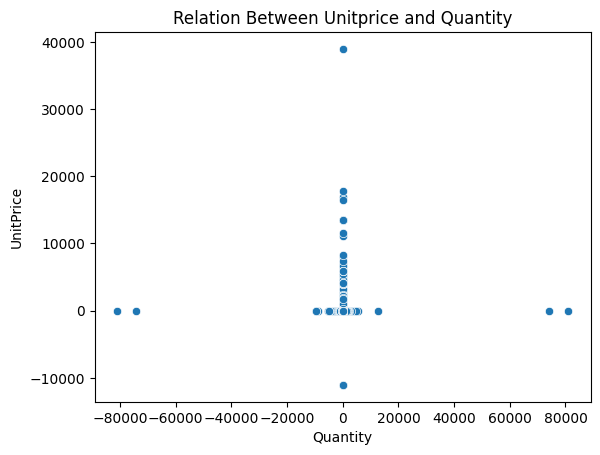

In [105]:
sns.scatterplot(data = df, x= "Quantity", y = "UnitPrice").set(title="Relation Between Unitprice and Quantity")
plt.show()

4.4. Plot a heatmap to display the correlation between numeric columns.



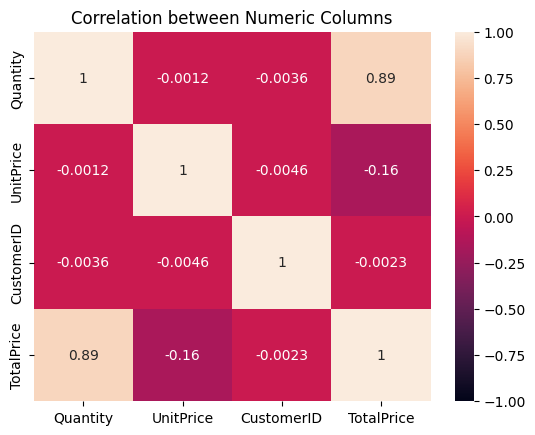

In [106]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True).set(title="Correlation between Numeric Columns")
plt.show()

## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



[Text(0.5, 1.0, 'Box Plot For Outliers')]

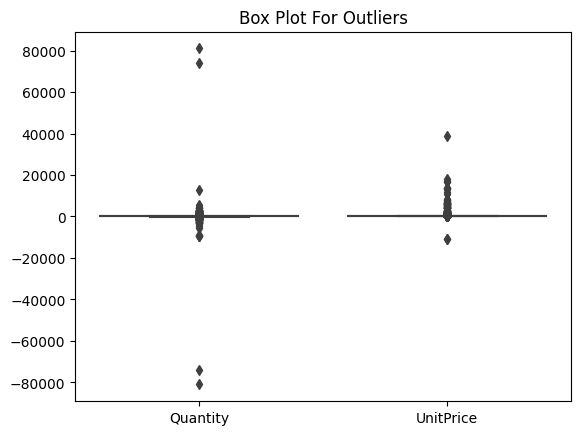

In [107]:
sns.boxplot(data=df[["Quantity","UnitPrice"]]).set(title="Box Plot For Outliers")

5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).



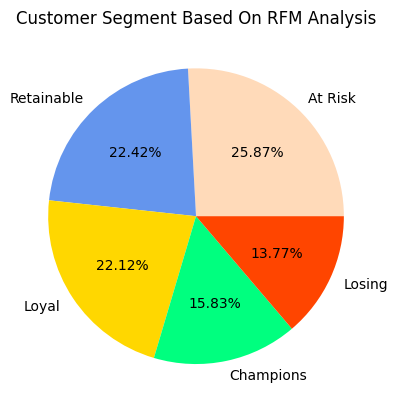

In [108]:
#Ref: https://clevertap.com/blog/rfm-analysis/
lastDate = df['InvoiceDate'].max()
subsetCustomer = df[["CustomerID","InvoiceDate","InvoiceNo","TotalPrice"]]
rfmDf=pd.DataFrame(subsetCustomer.groupby("CustomerID").agg({
    'InvoiceDate': lambda x: (lastDate - x.max()).days,
    "InvoiceNo":["nunique"],
    "TotalPrice":['sum']}))
rfmDf.columns = ["Recency","Frequency","Monetary"]
rfmDf.sort_values(by = ['Recency','Frequency','Monetary'],ascending = False)
#To rank
rfmDf['R_rank'] = rfmDf['Recency'].rank(ascending=False)
rfmDf['F_rank'] = rfmDf['Frequency'].rank(ascending=True)
rfmDf['M_rank'] = rfmDf['Monetary'].rank(ascending=True)
#To normalise
rfmDf['R_rankNorm'] = (rfmDf['R_rank']/rfmDf['R_rank'].max())*100
rfmDf['F_rankNorm'] = (rfmDf['F_rank']/rfmDf['F_rank'].max())*100
rfmDf['M_rankNorm'] = (rfmDf['M_rank']/rfmDf['M_rank'].max())*100

rfmDf.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)


#Weighted RFM Score
rfmDf['RFMScore'] = 0.20 * rfmDf['R_rankNorm']+0.30*rfmDf['F_rankNorm']+0.50*rfmDf['M_rankNorm']
#To give score out of 5
rfmDf['RFMScore'] = rfmDf['RFMScore']*0.05
rfmDf["CustomerSegment"] = np.where(rfmDf['RFMScore'] >=4, "Champions",(np.where(rfmDf['RFMScore'] >= 3,"Loyal",
                                        (np.where(rfmDf['RFMScore'] >= 2,"Retainable", np.where(rfmDf['RFMScore'] >= 1,'At Risk', 'Losing'))))))
plt.pie(rfmDf.CustomerSegment.value_counts(),
        labels=rfmDf.CustomerSegment.value_counts().index,
        autopct='%1.2f%%',colors=[
        # matplotlib named colors
        'peachpuff', 'cornflowerblue', 'gold', 'springgreen', 'orangered'])
plt.title("Customer Segment Based On RFM Analysis")
plt.show()

5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



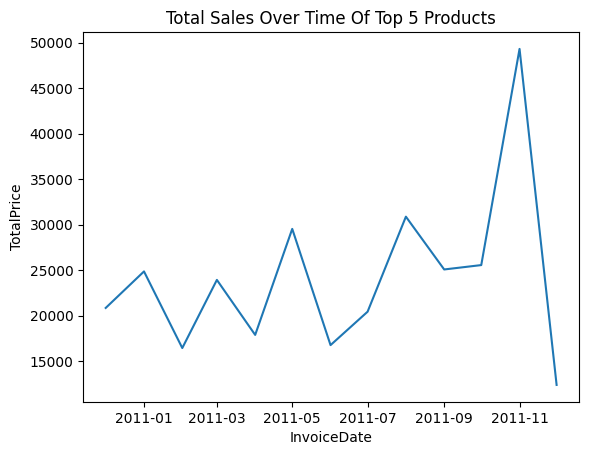

In [109]:
#Five diff
topProducts = list(df.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False).head(5).index)
sub = df[df["StockCode"].isin(topProducts)]
subMnth = sub.groupby(sub["InvoiceDate"].dt.to_period("M"))["TotalPrice"].sum().reset_index()
subMnth.InvoiceDate = subMnth.InvoiceDate.dt.to_timestamp()
sns.lineplot(data = subMnth,x = "InvoiceDate", y = "TotalPrice").set(title="Total Sales Over Time Of Top 5 Products")
plt.show()

## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [110]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
 9   Year         541909 non-null  int64         
 10  Month        541909 non-null  int64         
 11  Day          541909 non-null  int64         
 12  Hour         541909 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 53.7+ MB


6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [111]:
df["ReturnFlag"] = np.where(df["Quantity"]<0,1,0)
df["ReturnFlag"] = df["ReturnFlag"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
 9   Year         541909 non-null  int64         
 10  Month        541909 non-null  int64         
 11  Day          541909 non-null  int64         
 12  Hour         541909 non-null  int64         
 13  ReturnFlag   541909 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 54.

## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [112]:
# Calculate Recency, Frequency and Monetary for each customer
current_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                   # Frequency
    'TotalPrice': 'sum'                                      # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


7.2. Normalize the RFM matrix with StandardScaler:

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)
rfm_normalized

array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

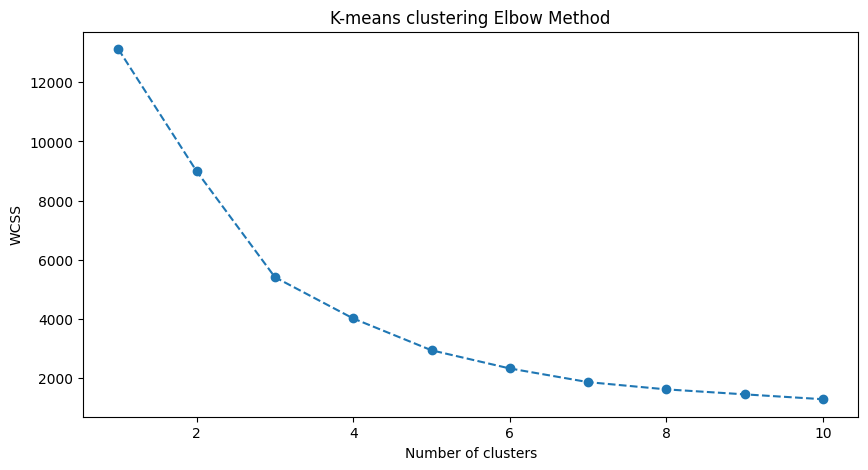

In [114]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering Elbow Method')
plt.show()

# Based on the elbow point, choose optimal clusters and run KMeans
optimal_clusters = 3  # this can change based on your elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(rfm_normalized)

rfm['Cluster'] = clusters

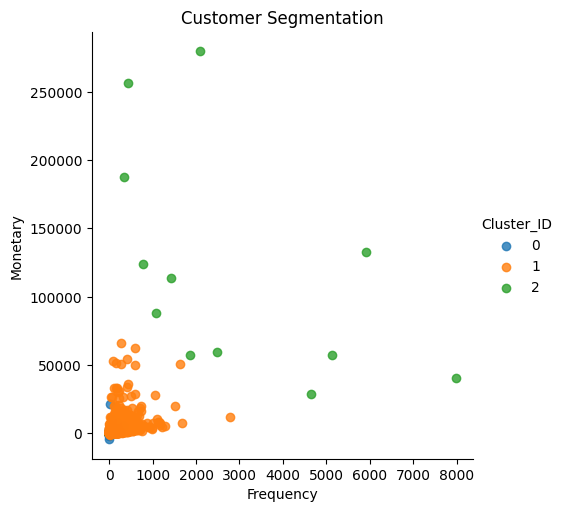

In [115]:
from sklearn.cluster import KMeans

# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(rfm_normalized)
rfm['Cluster_ID'] = y_kmeans
facet = sns.lmplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster_ID',
                   fit_reg=False, legend=True, legend_out=True).set(title="Customer Segmentation")

In [116]:
rfm

,Recency,Frequency,Monetary,Cluster,Cluster_ID
CustomerID,,,,,
12346.0,325,2,0.00,1,0
12347.0,1,182,4310.00,0,1
12348.0,74,31,1797.24,0,1
12349.0,18,73,1757.55,0,1
12350.0,309,17,334.40,1,0
...,...,...,...,...,...
18280.0,277,10,180.60,1,0
18281.0,180,7,80.82,1,0
18282.0,7,13,176.60,0,1


In [117]:
import plotly.express as px

fig = px.scatter_3d(rfm, x='Frequency', y='Monetary', z='Recency', color='Cluster_ID', hover_name = rfm.index )
fig.show()

## 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

In [118]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,ReturnFlag
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,0


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = df[['UnitPrice', 'Quantity','Year','Month','Day']]
target = df['ReturnFlag']

for col in ['InvoiceDate', 'InvoiceNo','StockCode', 'Description', 'Country', 'CustomerID']:
    if col in features.columns:
        del features[col]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106226
           1       1.00      1.00      1.00      2156

    accuracy                           1.00    108382
   macro avg       1.00      1.00      1.00    108382
weighted avg       1.00      1.00      1.00    108382



8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

In [120]:
!pip install category_encoders

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import category_encoders as ce
# Assuming df has dummy variables for categorical columns

features = df.drop(columns=['TotalPrice'])
target = df['TotalPrice']
for col in ['InvoiceDate', 'InvoiceNo','StockCode', 'Description', 'Country', 'CustomerID']:
    if col in features.columns:
        del features[col]
encoder = ce.OrdinalEncoder(cols=['ReturnFlag'])
encoder.fit(features)
features = encoder.transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)

print('RMSE:', mean_squared_error(y_test, predictions, squared=False))
print('R^2:', r2_score(y_test, predictions))

RMSE: 224.61708556636276
R^2: 0.8463275900531539


## 9. Association Rule Mining:
- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.
- 9.2 Based on the rules, suggest product bundling strategies to the retail store.

In [122]:
from mlxtend.frequent_patterns import apriori, association_rules

# Creating a basket
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_units)

# Build frequent items
frequent_itemsets = apriori(basket_encoded, min_support=0.03, use_colnames=True)

# Association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043606,0.041520,0.031416,0.720450,17.351850,0.029606,3.428656,0.985336
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.041520,0.043606,0.031416,0.756650,17.351850,0.029606,3.930120,0.983191
2,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.085576,0.049824,0.033748,0.394359,7.915034,0.029484,1.568878,0.955419
3,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.049824,0.085576,0.033748,0.677340,7.915034,0.029484,2.834015,0.919470


# Advanced EDA Techniques:

11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

In [123]:
product_revenue = df.groupby('StockCode')['TotalPrice'].sum()
total_revenue = df['TotalPrice'].sum()
# Creating dataframe for Product and Revenue
revenue_df = product_revenue.reset_index()
revenue_df.columns = ['StockCode', 'Revenue']
# Sort the products by revenue in descending order
revenue_df = revenue_df.sort_values(by='Revenue', ascending=False)
# Calculate the cumulative percentage of revenue
revenue_df['Cumulative Percentage'] = (revenue_df['Revenue'].cumsum() / revenue_df['Revenue'].sum()) * 100
# Point where we reach 80% cumulative revenue
threshold = 80
top_20_percent_products = revenue_df[revenue_df['Cumulative Percentage'] <= threshold]
top_20_percent_products = top_20_percent_products[['StockCode', 'Revenue', 'Cumulative Percentage']]
# Display the top 20% of products
print("Top 20% of products generating 80% of the revenue:")
print(top_20_percent_products[['StockCode', 'Revenue', 'Cumulative Percentage']])

Top 20% of products generating 80% of the revenue:
     StockCode    Revenue  Cumulative Percentage
4059       DOT  206245.48               2.115827
1348     22423  164762.19               3.806086
2733     47566   98302.98               4.814555
3536    85123A   97894.50               5.818833
3515    85099B   92356.03               6.766293
...        ...        ...                    ...
1117     22165    3315.45              79.838640
2992    84032A    3308.28              79.872578
1036     22079    3298.89              79.906421
1760     22855    3289.23              79.940165
2132     23239    3283.69              79.973851

[736 rows x 3 columns]


In [124]:
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum()
total_revenue = df['TotalPrice'].sum()
# Creating dataframe for customer and Revenue
revenue_df = customer_revenue.reset_index()
revenue_df.columns = ['CustomerID', 'Revenue']
# Sort the customers by revenue in descending order
revenue_df = revenue_df.sort_values(by='Revenue', ascending=False)
# Calculate the cumulative percentage of revenue
revenue_df['Cumulative Percentage'] = (revenue_df['Revenue'].cumsum() / revenue_df['Revenue'].sum()) * 100
# Point where we reach 80% cumulative revenue
threshold = 80
top_20_percent_customers = revenue_df[revenue_df['Cumulative Percentage'] <= threshold]
top_20_percent_customers = top_20_percent_customers[['CustomerID', 'Revenue', 'Cumulative Percentage']]
# Display the top 20% of customers
print("Top 20% of customers generating 80% of the revenue:")
print(top_20_percent_customers[['CustomerID', 'Revenue', 'Cumulative Percentage']])
#Because we have some NAN in customerID we didn't use that data for the analysis

Top 20% of customers generating 80% of the revenue:
      CustomerID    Revenue  Cumulative Percentage
1703     14646.0  279489.02               3.367311
4233     18102.0  256438.49               6.456907
3758     17450.0  187482.17               8.715710
1895     14911.0  132572.62              10.312958
55       12415.0  123725.45              11.803614
...          ...        ...                    ...
3263     16762.0    1501.38              79.917566
3846     17571.0    1498.51              79.935620
2911     16279.0    1496.68              79.953652
741      13320.0    1491.70              79.971624
2642     15916.0    1491.24              79.989591

[1170 rows x 3 columns]


12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

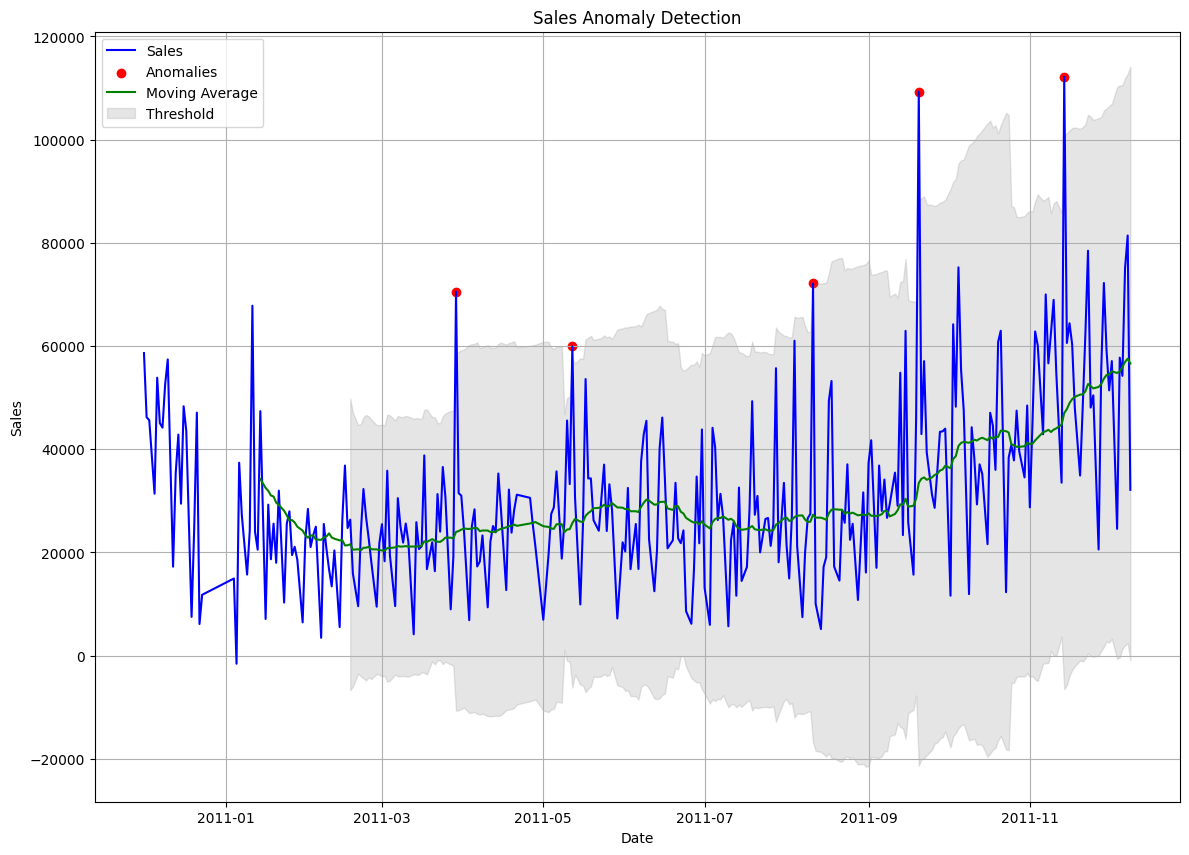

In [125]:
#Ref: https://medium.com/@sztistvan/anomaly-detection-in-time-series-using-chatgpt-3fc48f958c88
sub = df[["InvoiceDate","TotalPrice"]]
sub["InvoiceDate"] = sub["InvoiceDate"].dt.date
sub = sub.groupby(["InvoiceDate"])["TotalPrice"].sum().reset_index()
#Monthly Moving Average
window_size = 30
ma = sub['TotalPrice'].rolling(window_size).mean()

# Calculate the deviation from the moving average
deviation = sub['TotalPrice'] - ma

# Calculate the standard deviation of the deviation
std_deviation = deviation.rolling(window_size).std()

# Calculate the threshold for anomaly detection
threshold =  3 * std_deviation

# Detect anomalies based on deviations from the moving average
anomalies = sub[deviation.abs() > threshold]

# Plot the total sales and the anomalies
plt.subplots(figsize=(14, 10))
plt.plot(sub['InvoiceDate'], sub['TotalPrice'], color='blue', label='Sales')
plt.scatter(anomalies['InvoiceDate'], anomalies['TotalPrice'], color='red', label='Anomalies')
plt.plot(sub['InvoiceDate'], ma, color='green', label='Moving Average')
plt.fill_between(sub['InvoiceDate'], ma-threshold, ma+threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Sales Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

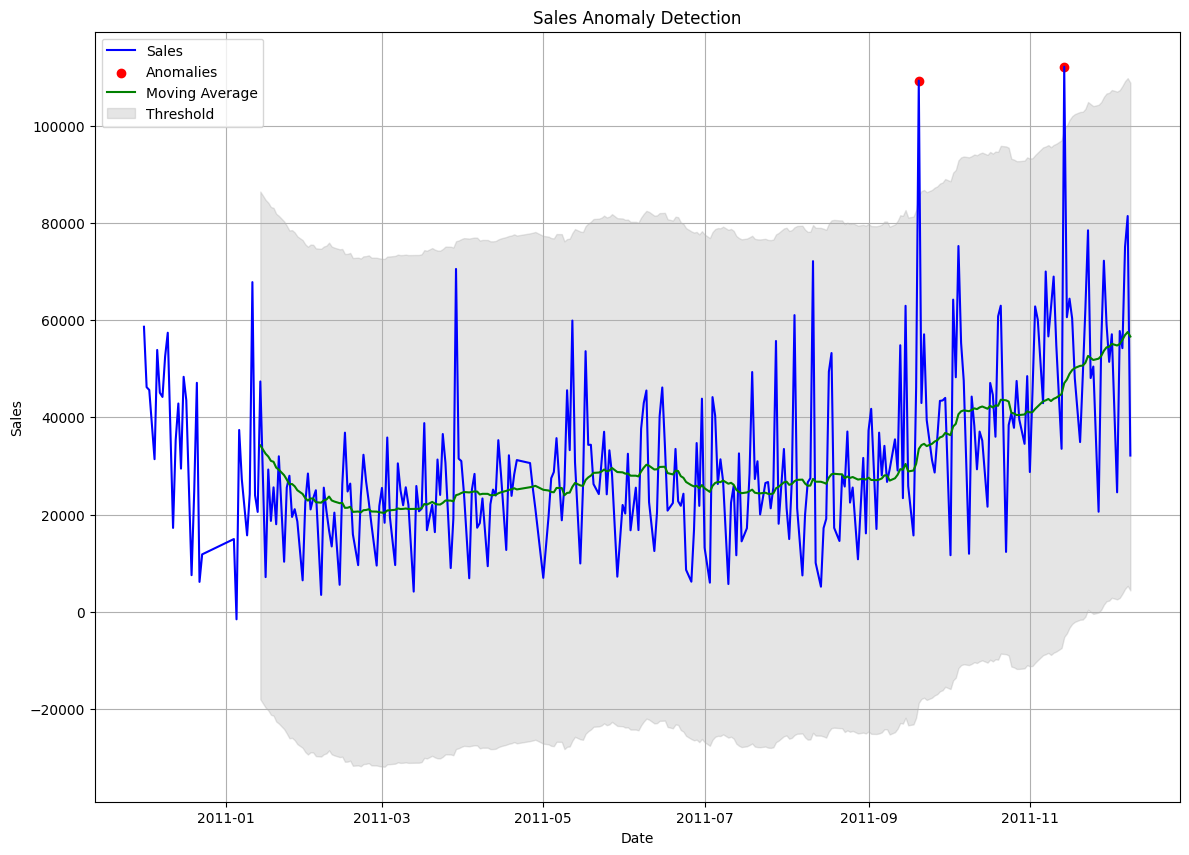

In [126]:
#Using Z score
# Calculate the average of the sales
mean = sub['TotalPrice'].mean()

# Calculate the deviation from the average
deviation = sub['TotalPrice'] - mean

# Calculate the standard deviation of the deviation
std_deviation = deviation.std() # same as we would calculate df['value'].std()

# Calculate Z-score - we don't use it directly, for reference only
z_score = deviation / std_deviation # z_score = (value-mean)/std

# Calculate the threshold for anomaly detection
threshold = 3 * std_deviation

# Detect anomalies based on deviations from the moving average
anomalies = sub[deviation.abs() > threshold]
# Plot the sales and the anomalies
plt.subplots(figsize=(14, 10))
plt.plot(sub['InvoiceDate'], sub['TotalPrice'], color='blue', label='Sales')
plt.scatter(anomalies['InvoiceDate'], anomalies['TotalPrice'], color='red', label='Anomalies')
plt.plot(sub['InvoiceDate'], ma, color='green', label='Moving Average')
plt.fill_between(sub['InvoiceDate'], ma-threshold, ma+threshold, color='gray', alpha=0.2, label='Threshold')
plt.legend()
plt.title('Sales Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()


# Advanced Modeling Techniques:

13. Market Basket Analysis Enhancements:
- Dig deeper into association rules. For instance, find rules with a high lift and high confidence.
- Analyze antecedents with more than one item, which can give bundled product suggestions.

<Axes: xlabel='support', ylabel='confidence'>

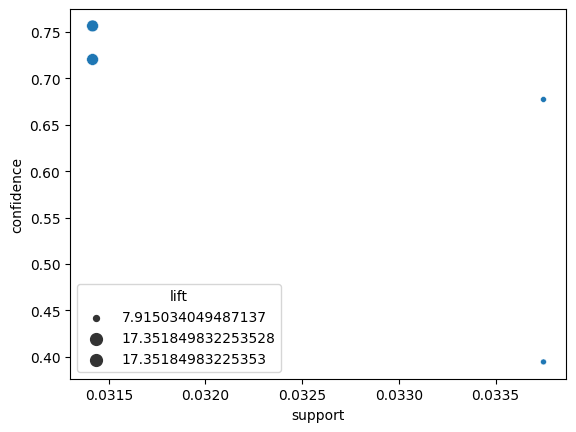

In [127]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
top_rules = rules[rules['confidence'] > 0.01]
sns.scatterplot(x='support', y='confidence', size='lift', data=top_rules)

## 14. Product Recommendation Systems:
- Develop a system to recommend products to users.
- Consider collaborative filtering techniques, matrix factorization, or deep learning-based approaches like neural collaborative filtering.

In [128]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-product matrix
user_product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)
reindexed_user_product_matrix = user_product_matrix.reset_index()
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(user_product_matrix)

# Get product recommendations for a user based on their purchase history
def get_recommendations(user_id, cosine_sim=cosine_sim):
    idx = reindexed_user_product_matrix[reindexed_user_product_matrix['CustomerID']==user_id].index[0]
    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort users based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get products bought by the most similar user
    user_idx = sim_scores[1][0]
    similar_user_products = user_product_matrix.iloc[user_idx]
    recommended_products = similar_user_products[similar_user_products > 0].index.tolist()

    return recommended_products

stockcodelist = get_recommendations(16081.0) # Replace 2154 with an actual CustomerID
print(f"Stockcode list for recommended products are - {stockcodelist}")

Stockcode list for recommended products are - ['20719', '21136', '21385', '21390', '21713', '21755', '21756', '21794', '21932', '22173', '22189', '22291', '22292', '22293', '22294', '22297', '22424', '22426', '22429', '22488', '22496', '22639', '22690', '22822', '23014', '23091', '23144', '23145', '23207', '23208', '23209', '23407', '47503A', '48138', '48184', '48185', '48187', '48188', '48194', '71459', '84879', '84978', '85059', '85066']


## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# For this example, let's assume if a customer hasn't purchased in the last 6 months, they've churned
df['LastPurchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('max')
max_date = df['InvoiceDate'].max()
df['Churn'] = (max_date - df['LastPurchase']).dt.days > 180

X = df[['TotalPrice', 'Quantity',"ReturnFlag","UnitPrice"]] # Add more relevant features
encoder = ce.OrdinalEncoder(cols=['ReturnFlag'])
encoder.fit(X)
X = encoder.transform(X)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98    155993
        True       0.00      0.00      0.00      6580

    accuracy                           0.96    162573
   macro avg       0.48      0.50      0.49    162573
weighted avg       0.92      0.96      0.94    162573



## 16. Hyperparameter Tuning and Model Optimization:
- For any given machine learning model you use, apply techniques like grid search or random search for hyperparameter tuning.
- Use ensemble methods (e.g., stacking, bagging, boosting) to enhance prediction performance.

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.1, 1, 10, 100],

    'penalty': ['l2']
}

grid = GridSearchCV(LogisticRegression(), param_grid, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   1.6s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   1.3s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   1.5s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   2.4s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.960 total time=   2.3s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.960 total time=   2.9s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.960 total time=   1.5s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.960 total time=   1.6s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.960 total time=   2.1s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.960 total time=   1.4s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.960 total time=   1.5s
[CV 2/5] END ..................C=10, penalty=l2;,